In [70]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import linprog

---

# Optimizing a Manufacturing Production Plan

You are a production manager at a small manufacturing company that produces two types of products: **Product A** and **Product B**. Your goal is to determine the optimal production quantities to maximize profit while minimizing environmental impact.

### Problem Setup

**Decision Variables:**
- $x_1$ = units of Product A to produce
- $x_2$ = units of Product B to produce

**Objective Functions:**

1. **Maximize Profit** (to be converted to minimization):
   - Profit from Product A: ₱500 per unit
   - Profit from Product B: ₱800 per unit
   - Total Profit: $f_1(x_1, x_2) = 500x_1 + 800x_2$

2. **Minimize Environmental Impact** (CO₂ emissions in kg):
   - Product A generates 3 kg CO₂ per unit
   - Product B generates 2 kg CO₂ per unit
   - Total Impact: $f_2(x_1, x_2) = 3x_1 + 2x_2$

**Constraints:**

1. **Production capacity**: $2x_1 + 3x_2 \leq 1200$ (machine hours available)
2. **Material availability**: $x_1 + x_2 \leq 500$ (units of raw material)
3. **Minimum production**: $x_1 \geq 50$ and $x_2 \geq 50$ (contractual obligations)
4. **Non-negativity**: $x_1, x_2 \geq 0$

### Tasks

**Part 1: Individual Objective Optimization**
1. Solve the problem to **maximize profit** ignoring environmental impact
2. Solve the problem to **minimize environmental impact** ignoring profit
3. Report the optimal solutions for both cases and calculate both objectives for each solution

**Part 2: Pareto Front Analysis**

4. Visualize the design space and criterion space
5. Identify at least 5 points along the Pareto front using the slope method

**Part 3: Trade-off Analysis**

6. Create a table showing the trade-offs between profit and environmental impact for your Pareto solutions
7. Calculate the marginal rate of substitution between objectives (how much profit do you lose per kg of CO₂ reduced?)

**Part 4: Sensitivity Analysis**

8. What happens if the profit from Product B increases to ₱1000 per unit? How does this affect the Pareto front?
9.  Discuss how the Pareto front would change if the company could reduce the CO₂ emissions of Product A to 2 kg per unit

# **Part 1: Individual Objective Optimization**

## Task 1.1 Max Profit

In [71]:
c_profit = [-500, -800]

A_ub = [
    [2, 3],
    [1, 1],
]
b_ub = [1200, 500]

bounds = [(50, None), (50, None)]

# Solve using simplex method
result_profit = linprog(
    c_profit, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method="highs"
)

## Task 1.2 Min Environmental Impact

In [72]:
c_environment = [3, 2]

result_environment = linprog(
    c_environment, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method="highs"
)

## Task 1.3 Report the optimal solutions for both cases and calculate both objectives for each solution

In [73]:
print("Optimization Result_profit:")
print(f"Status: {result_profit.message}")
print("\nOptimal Solution:")
print(f"  x₁ = {result_profit.x[0]:.2f}")
print(f"  x₂ = {result_profit.x[1]:.2f}")
print(f"\nMax Profit: Php {-result_profit.fun:,.2f}")


print("\nOptimization Result_environment:")
print(f"Status: {result_environment.message}")
print("\nOptimal Solution:")
print(f"  x₁ = {result_environment.x[0]:.2f}")
print(f"  x₂ = {result_environment.x[1]:.2f}")
print(f"\nMin Environmental Impact: {result_environment.fun:,.2f}kgs")

Optimization Result_profit:
Status: Optimization terminated successfully. (HiGHS Status 7: Optimal)

Optimal Solution:
  x₁ = 50.00
  x₂ = 366.67

Max Profit: Php 318,333.33

Optimization Result_environment:
Status: Optimization terminated successfully. (HiGHS Status 7: Optimal)

Optimal Solution:
  x₁ = 50.00
  x₂ = 50.00

Min Environmental Impact: 250.00kgs


# **Part 2: Pareto Front Analysis**

## Task 2.4 Visualize Design Space and Criterion Space

### Step 1: Find Corner Points of Feasible Region

In [74]:
def find_corner_points():
    """Find corner points by solving system of equations at intersections."""
    corners = []

    # Corner 1: Intersection of x1=50 and x2=50 (minimum production)
    x1, x2 = 50, 50
    if 2 * x1 + 3 * x2 <= 1200 and x1 + x2 <= 500:
        corners.append((x1, x2, "x₁=50, x₂=50"))

    # Corner 2: Intersection of x1=50 and production capacity
    # 2(50) + 3x2 = 1200 → 100 + 3x2 = 1200 → x2 = 366.67
    x1, x2 = 50, (1200 - 2 * 50) / 3
    if x1 + x2 <= 500 and x2 >= 50:
        corners.append((x1, x2, "x₁=50, capacity"))

    # Corner 3: Intersection of x1=50 and material availability
    # 50 + x2 = 500 → x2 = 450
    x1, x2 = 50, 450
    if 2 * x1 + 3 * x2 <= 1200 and x2 >= 50:
        corners.append((x1, x2, "x₁=50, material"))

    # Corner 4: Intersection of production capacity and material availability
    # 2x1 + 3x2 = 1200 and x1 + x2 = 500
    # From x1 + x2 = 500: x1 = 500 - x2
    # Substitute: 2(500 - x2) + 3x2 = 1200 → 1000 - 2x2 + 3x2 = 1200 → x2 = 200
    A = np.array([[2, 3], [1, 1]])
    b = np.array([1200, 500])
    x = np.linalg.solve(A, b)
    if x[0] >= 50 and x[1] >= 50:
        corners.append((x[0], x[1], "capacity ∩ material"))

    # Corner 5: Intersection of x2=50 and production capacity
    # 2x1 + 3(50) = 1200 → 2x1 + 150 = 1200 → x1 = 525
    x1, x2 = (1200 - 3 * 50) / 2, 50
    if x1 + x2 <= 500 and x1 >= 50:
        corners.append((x1, x2, "x₂=50, capacity"))

    # Corner 6: Intersection of x2=50 and material availability
    # x1 + 50 = 500 → x1 = 450
    x1, x2 = 450, 50
    if 2 * x1 + 3 * x2 <= 1200 and x1 >= 50:
        corners.append((x1, x2, "x₂=50, material"))

    return corners


corners = find_corner_points()
print("Corner Points of Feasible Region:")
print("=" * 70)
for i, (x1, x2, desc) in enumerate(corners, 1):
    profit = 500 * x1 + 800 * x2
    emissions = 3 * x1 + 2 * x2
    print(f"\nCorner {i}: ({x1:.2f}, {x2:.2f}) - {desc}")
    print(f"  Profit: Php {profit:,.2f}")
    print(f"  Emissions: {emissions:.2f} kg CO₂")

Corner Points of Feasible Region:

Corner 1: (50.00, 50.00) - x₁=50, x₂=50
  Profit: Php 65,000.00
  Emissions: 250.00 kg CO₂

Corner 2: (50.00, 366.67) - x₁=50, capacity
  Profit: Php 318,333.33
  Emissions: 883.33 kg CO₂

Corner 3: (300.00, 200.00) - capacity ∩ material
  Profit: Php 310,000.00
  Emissions: 1300.00 kg CO₂

Corner 4: (450.00, 50.00) - x₂=50, material
  Profit: Php 265,000.00
  Emissions: 1450.00 kg CO₂


### Step 2: Visualize Design Space and Criterion Space

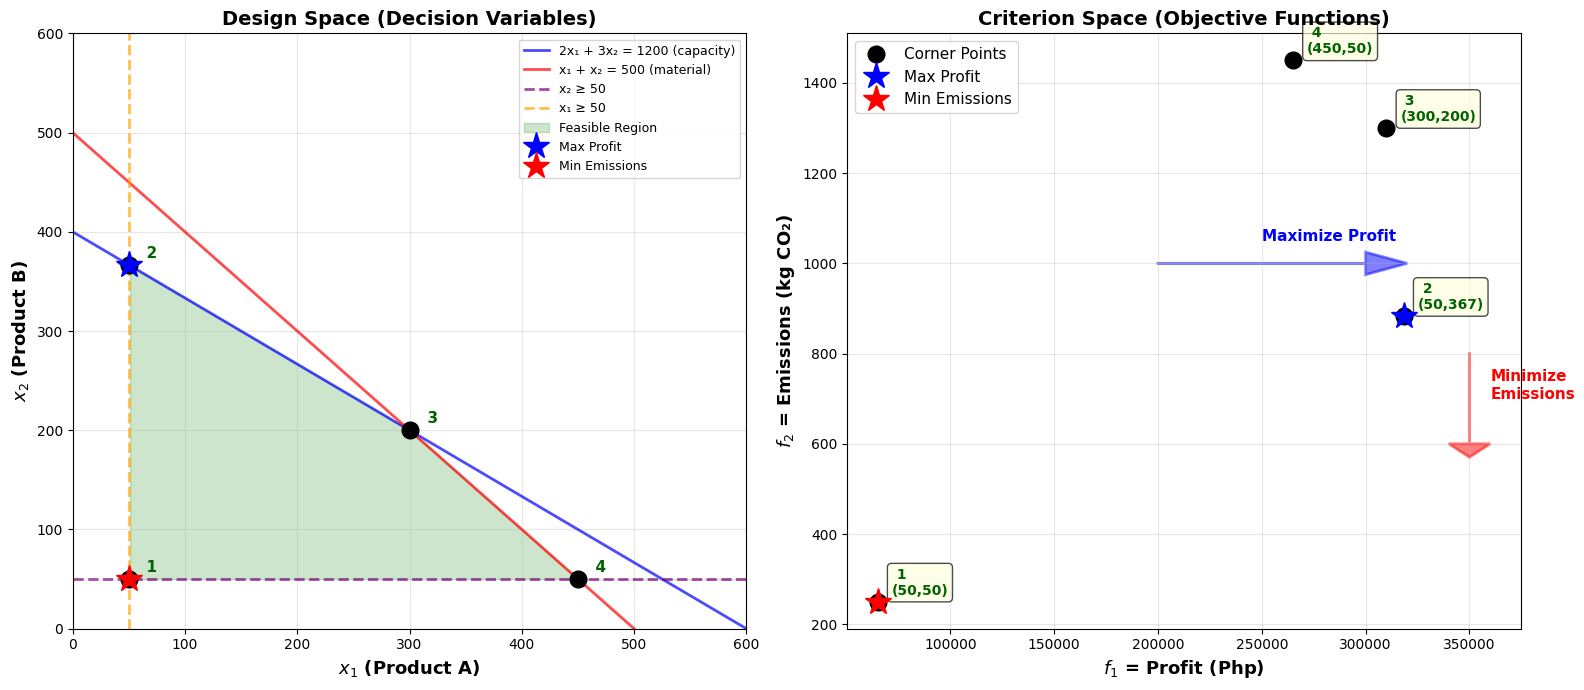

In [75]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# ============= LEFT PLOT: DESIGN SPACE =============
x1_range = np.linspace(0, 600, 400)

# Constraint 1: 2x1 + 3x2 <= 1200  →  x2 <= (1200 - 2x1) / 3
x2_capacity = (1200 - 2 * x1_range) / 3

# Constraint 2: x1 + x2 <= 500  →  x2 <= 500 - x1
x2_material = 500 - x1_range

# Plot constraint lines
ax1.plot(
    x1_range,
    x2_capacity,
    "b-",
    linewidth=2,
    alpha=0.7,
    label="2x₁ + 3x₂ = 1200 (capacity)",
)
ax1.plot(
    x1_range,
    x2_material,
    "r-",
    linewidth=2,
    alpha=0.7,
    label="x₁ + x₂ = 500 (material)",
)

# Minimum production constraints
ax1.axhline(
    y=50,
    color="purple",
    linestyle="--",
    linewidth=2,
    alpha=0.7,
    label="x₂ ≥ 50",
)
ax1.axvline(
    x=50,
    color="orange",
    linestyle="--",
    linewidth=2,
    alpha=0.7,
    label="x₁ ≥ 50",
)

# Fill feasible region
x2_upper = np.minimum(x2_capacity, x2_material)
x2_upper = np.minimum(x2_upper, 600)
x2_upper = np.maximum(x2_upper, 50)

# Only fill where x1 >= 50
x1_feasible = x1_range[x1_range >= 50]
x2_feasible = x2_upper[x1_range >= 50]
ax1.fill_between(
    x1_feasible,
    50,
    x2_feasible,
    alpha=0.2,
    color="green",
    label="Feasible Region",
)

# Plot corner points
corner_x1 = [c[0] for c in corners]
corner_x2 = [c[1] for c in corners]
ax1.plot(corner_x1, corner_x2, "ko", markersize=12, zorder=5)

# Label corner points
for i, (x1, x2, desc) in enumerate(corners, 1):
    ax1.annotate(
        f"  {i}",
        xy=(x1, x2),
        xytext=(5, 5),
        textcoords="offset points",
        fontsize=11,
        fontweight="bold",
        color="darkgreen",
    )

# Highlight optimal solutions
ax1.plot(
    result_profit.x[0],
    result_profit.x[1],
    "*",
    color="blue",
    markersize=20,
    label="Max Profit",
    zorder=7,
)
ax1.plot(
    result_environment.x[0],
    result_environment.x[1],
    "*",
    color="red",
    markersize=20,
    label="Min Emissions",
    zorder=7,
)

ax1.set_xlim(0, 600)
ax1.set_ylim(0, 600)
ax1.set_xlabel("$x_1$ (Product A)", fontsize=13, fontweight="bold")
ax1.set_ylabel("$x_2$ (Product B)", fontsize=13, fontweight="bold")
ax1.set_title(
    "Design Space (Decision Variables)", fontsize=14, fontweight="bold"
)
ax1.grid(True, alpha=0.3)
ax1.legend(loc="upper right", fontsize=9)

# ============= RIGHT PLOT: CRITERION SPACE =============
# Map corner points to criterion space (Note: we need to maximize profit, so negate it)
criterion_points = []
for x1, x2, desc in corners:
    profit = 500 * x1 + 800 * x2
    emissions = 3 * x1 + 2 * x2
    criterion_points.append((profit, emissions, x1, x2, desc))

criterion_profits = [cp[0] for cp in criterion_points]
criterion_emissions = [cp[1] for cp in criterion_points]

# Plot all corner points in criterion space
ax2.plot(
    criterion_profits,
    criterion_emissions,
    "ko",
    markersize=12,
    label="Corner Points",
    zorder=5,
)

# Label each point
for i, (profit, emissions, x1, x2, desc) in enumerate(criterion_points, 1):
    ax2.annotate(
        f" {i}\n({x1:.0f},{x2:.0f})",
        xy=(profit, emissions),
        xytext=(10, 5),
        textcoords="offset points",
        fontsize=10,
        fontweight="bold",
        color="darkgreen",
        bbox=dict(
            boxstyle="round,pad=0.3", facecolor="lightyellow", alpha=0.7
        ),
    )

# Highlight single-objective optima
profit_max = 500 * result_profit.x[0] + 800 * result_profit.x[1]
emissions_at_max_profit = 3 * result_profit.x[0] + 2 * result_profit.x[1]
ax2.plot(
    profit_max,
    emissions_at_max_profit,
    "*",
    color="blue",
    markersize=20,
    label="Max Profit",
    zorder=7,
)

profit_at_min_emissions = (
    500 * result_environment.x[0] + 800 * result_environment.x[1]
)
emissions_min = result_environment.fun
ax2.plot(
    profit_at_min_emissions,
    emissions_min,
    "*",
    color="red",
    markersize=20,
    label="Min Emissions",
    zorder=7,
)

# Add arrows to show direction of preference
ax2.arrow(
    200000,
    1000,
    100000,
    0,
    head_width=50,
    head_length=20000,
    fc="blue",
    ec="blue",
    alpha=0.5,
    linewidth=2,
)
ax2.text(
    250000,
    1050,
    "Maximize Profit",
    fontsize=11,
    color="blue",
    fontweight="bold",
)

ax2.arrow(
    350000,
    800,
    0,
    -200,
    head_width=20000,
    head_length=30,
    fc="red",
    ec="red",
    alpha=0.5,
    linewidth=2,
)
ax2.text(
    360000,
    700,
    "Minimize\nEmissions",
    fontsize=11,
    color="red",
    fontweight="bold",
)

ax2.set_xlabel("$f_1$ = Profit (Php)", fontsize=13, fontweight="bold")
ax2.set_ylabel("$f_2$ = Emissions (kg CO₂)", fontsize=13, fontweight="bold")
ax2.set_title(
    "Criterion Space (Objective Functions)", fontsize=14, fontweight="bold"
)
ax2.grid(True, alpha=0.3)
ax2.legend(loc="upper left", fontsize=11)

plt.tight_layout()
plt.show()

### Step 3: Identify Pareto Optimal Solutions

In [76]:
def is_dominated(point_a, point_b):
    """Check if point_b is dominated by point_a.
    For our problem: maximize profit (higher is better), minimize emissions (lower is better)
    """
    profit_a, emissions_a = point_a[0], point_a[1]
    profit_b, emissions_b = point_b[0], point_b[1]

    # A dominates B if A has higher profit AND lower emissions
    # OR A has higher profit with equal emissions
    # OR A has equal profit with lower emissions
    at_least_as_good = (profit_a >= profit_b) and (emissions_a <= emissions_b)
    strictly_better = (profit_a > profit_b) or (emissions_a < emissions_b)

    return at_least_as_good and strictly_better


print("Pareto Dominance Analysis:")
print("=" * 80)
print("\nCorner Points in Criterion Space:")
for i, (profit, emissions, x1, x2, desc) in enumerate(criterion_points, 1):
    print(
        f"  Point {i}: Profit = Php {profit:>10,.0f}, Emissions = {emissions:>7.2f} kg CO₂  |  ({x1:.1f}, {x2:.1f})"
    )

print("\n" + "-" * 80)
print("Dominance Relationships:")
print("-" * 80)

dominated = [False] * len(criterion_points)

for i in range(len(criterion_points)):
    for j in range(len(criterion_points)):
        if i != j and is_dominated(criterion_points[i], criterion_points[j]):
            profit_i, emissions_i = (
                criterion_points[i][0],
                criterion_points[i][1],
            )
            profit_j, emissions_j = (
                criterion_points[j][0],
                criterion_points[j][1],
            )
            print(f"Point {i + 1} dominates Point {j + 1}:")
            print(
                f"  Point {i + 1}: (Php {profit_i:,.0f}, {emissions_i:.2f} kg CO₂)"
            )
            print(
                f"  Point {j + 1}: (Php {profit_j:,.0f}, {emissions_j:.2f} kg CO₂)"
            )
            print(f"  Reason: Point {i + 1} is better in: ", end="")
            reasons = []
            if profit_i > profit_j:
                reasons.append("profit")
            if emissions_i < emissions_j:
                reasons.append("emissions")
            print(", ".join(reasons))
            print()
            dominated[j] = True

print("=" * 80)
print("\nPareto Optimal Solutions (Non-dominated Points):")
pareto_optimal_indices = []
for i, is_dom in enumerate(dominated):
    if not is_dom:
        profit, emissions, x1, x2, desc = criterion_points[i]
        pareto_optimal_indices.append(i)
        print(
            f"  Point {i + 1}: (x₁={x1:.1f}, x₂={x2:.1f}) -> Profit=Php {profit:,.0f}, Emissions={emissions:.2f} kg CO₂"
        )

print("\nDominated Solutions:")
for i, is_dom in enumerate(dominated):
    if is_dom:
        profit, emissions, x1, x2, desc = criterion_points[i]
        print(
            f"  Point {i + 1}: (x₁={x1:.1f}, x₂={x2:.1f}) -> Profit=Php {profit:,.0f}, Emissions={emissions:.2f} kg CO₂"
        )

print("\n" + "=" * 80)

Pareto Dominance Analysis:

Corner Points in Criterion Space:
  Point 1: Profit = Php     65,000, Emissions =  250.00 kg CO₂  |  (50.0, 50.0)
  Point 2: Profit = Php    318,333, Emissions =  883.33 kg CO₂  |  (50.0, 366.7)
  Point 3: Profit = Php    310,000, Emissions = 1300.00 kg CO₂  |  (300.0, 200.0)
  Point 4: Profit = Php    265,000, Emissions = 1450.00 kg CO₂  |  (450.0, 50.0)

--------------------------------------------------------------------------------
Dominance Relationships:
--------------------------------------------------------------------------------
Point 2 dominates Point 3:
  Point 2: (Php 318,333, 883.33 kg CO₂)
  Point 3: (Php 310,000, 1300.00 kg CO₂)
  Reason: Point 2 is better in: profit, emissions

Point 2 dominates Point 4:
  Point 2: (Php 318,333, 883.33 kg CO₂)
  Point 4: (Php 265,000, 1450.00 kg CO₂)
  Reason: Point 2 is better in: profit, emissions

Point 3 dominates Point 4:
  Point 3: (Php 310,000, 1300.00 kg CO₂)
  Point 4: (Php 265,000, 1450.00 kg CO₂)

### Step 4: Visualize Pareto Front

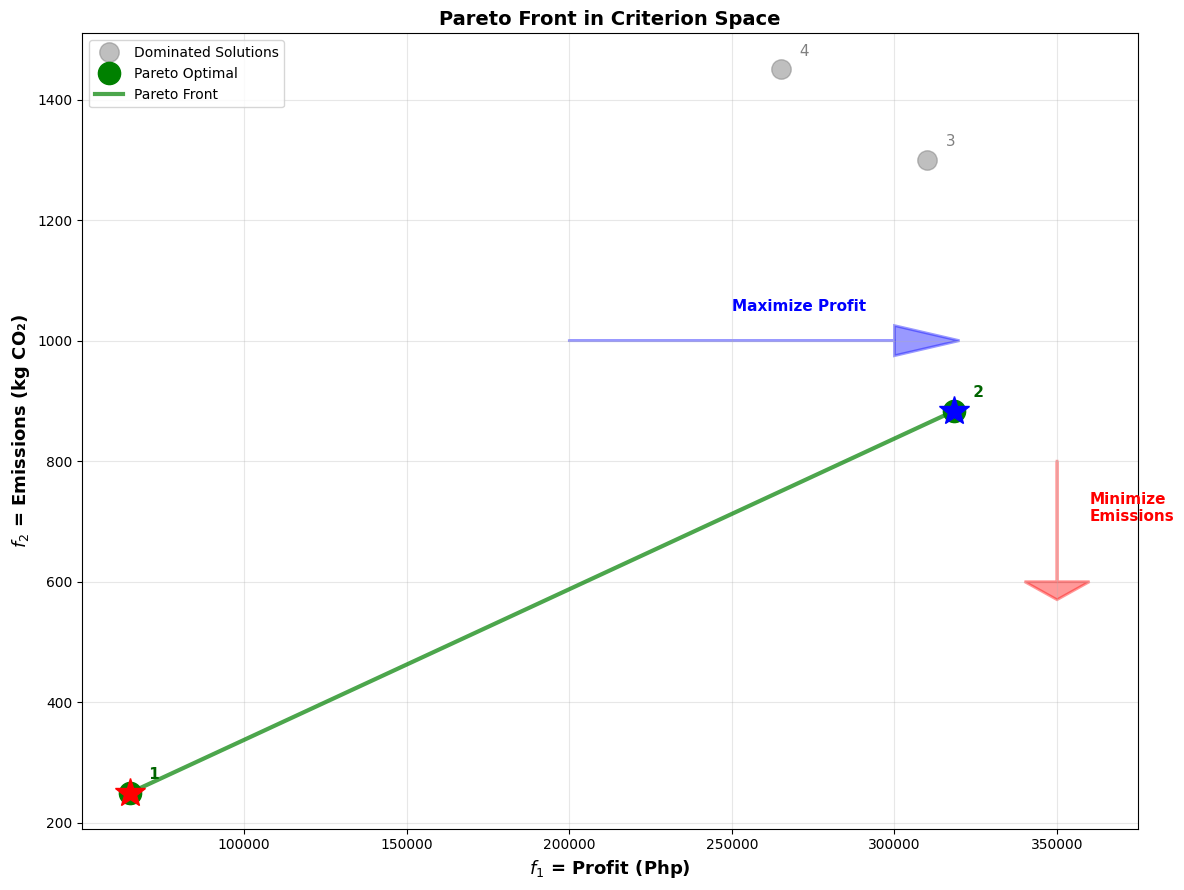

In [77]:
fig, ax = plt.subplots(figsize=(12, 9))

# Separate Pareto optimal and dominated points
pareto_profits = [criterion_points[i][0] for i in pareto_optimal_indices]
pareto_emissions = [criterion_points[i][1] for i in pareto_optimal_indices]
pareto_labels = [i + 1 for i in pareto_optimal_indices]

dominated_indices = [i for i in range(len(criterion_points)) if dominated[i]]
dominated_profits = [criterion_points[i][0] for i in dominated_indices]
dominated_emissions = [criterion_points[i][1] for i in dominated_indices]
dominated_labels = [i + 1 for i in dominated_indices]

# Plot dominated points
if dominated_profits:
    ax.plot(
        dominated_profits,
        dominated_emissions,
        "o",
        color="gray",
        markersize=14,
        alpha=0.5,
        label="Dominated Solutions",
        zorder=3,
    )
    for profit, emissions, label in zip(
        dominated_profits, dominated_emissions, dominated_labels
    ):
        ax.annotate(
            f" {label}",
            xy=(profit, emissions),
            xytext=(10, 10),
            textcoords="offset points",
            fontsize=11,
            color="gray",
        )

# Plot Pareto optimal points
ax.plot(
    pareto_profits,
    pareto_emissions,
    "o",
    color="green",
    markersize=16,
    label="Pareto Optimal",
    zorder=5,
)

# Connect Pareto points to form the Pareto front
# Sort by profit (descending) for proper line connection
sorted_pareto = sorted(
    zip(pareto_profits, pareto_emissions, pareto_labels), reverse=True
)
sorted_profits = [p[0] for p in sorted_pareto]
sorted_emissions = [p[1] for p in sorted_pareto]
sorted_labels = [p[2] for p in sorted_pareto]

ax.plot(
    sorted_profits,
    sorted_emissions,
    "-",
    color="green",
    linewidth=3,
    alpha=0.7,
    label="Pareto Front",
    zorder=4,
)

# Label Pareto optimal points
for profit, emissions, label in zip(
    sorted_profits, sorted_emissions, sorted_labels
):
    ax.annotate(
        f" {label}",
        xy=(profit, emissions),
        xytext=(10, 10),
        textcoords="offset points",
        fontsize=11,
        fontweight="bold",
        color="darkgreen",
    )

# Highlight single-objective optima
ax.plot(
    profit_max,
    emissions_at_max_profit,
    "*",
    color="blue",
    markersize=22,
    zorder=7,
)
ax.plot(
    profit_at_min_emissions,
    emissions_min,
    "*",
    color="red",
    markersize=22,
    zorder=7,
)

# Preference arrows
ax.arrow(
    200000,
    1000,
    100000,
    0,
    head_width=50,
    head_length=20000,
    fc="blue",
    ec="blue",
    alpha=0.4,
    linewidth=2,
)
ax.text(
    250000,
    1050,
    "Maximize Profit",
    fontsize=11,
    color="blue",
    fontweight="bold",
)

ax.arrow(
    350000,
    800,
    0,
    -200,
    head_width=20000,
    head_length=30,
    fc="red",
    ec="red",
    alpha=0.4,
    linewidth=2,
)
ax.text(
    360000,
    700,
    "Minimize\nEmissions",
    fontsize=11,
    color="red",
    fontweight="bold",
)

ax.set_xlabel("$f_1$ = Profit (Php)", fontsize=13, fontweight="bold")
ax.set_ylabel("$f_2$ = Emissions (kg CO₂)", fontsize=13, fontweight="bold")
ax.set_title("Pareto Front in Criterion Space", fontsize=14, fontweight="bold")
ax.grid(True, alpha=0.3)
ax.legend(loc="upper left", fontsize=10)

plt.tight_layout()
plt.show()

## Task 2.5 Identify at least 5 points along the Pareto Front using the slope method

In [78]:
# Calculate slope of Pareto front between extreme points
pareto_points_sorted = sorted(
    [
        (criterion_points[i][0], criterion_points[i][1])
        for i in pareto_optimal_indices
    ],
    reverse=True,
)

# Highest profit point (leftmost on criterion space when plotting profit on x-axis)
p1_profit, p1_emissions = pareto_points_sorted[0]

# Lowest profit point (rightmost)
p2_profit, p2_emissions = pareto_points_sorted[-1]

# Calculate slope (change in emissions / change in profit)
slope = (
    (p2_emissions - p1_emissions) / (p2_profit - p1_profit)
    if (p2_profit - p1_profit) != 0
    else 0
)

print(f"Pareto Front Slope: {slope:.6e} kg CO₂/Php")
print(f"Trade-off: Php {abs(1 / slope):,.2f} profit loss per kg CO₂ reduced")
print("\nExtremes of Pareto Front:")
print(
    f"  Max Profit Point: Profit = Php {p1_profit:,.2f}, Emissions = {p1_emissions:.2f} kg CO₂"
)
print(
    f"  Min Emissions Point: Profit = Php {p2_profit:,.2f}, Emissions = {p2_emissions:.2f} kg CO₂"
)

Pareto Front Slope: 2.500000e-03 kg CO₂/Php
Trade-off: Php 400.00 profit loss per kg CO₂ reduced

Extremes of Pareto Front:
  Max Profit Point: Profit = Php 318,333.33, Emissions = 883.33 kg CO₂
  Min Emissions Point: Profit = Php 65,000.00, Emissions = 250.00 kg CO₂


In [79]:
# Generate intermediate Pareto optimal solutions using slope
n_points = 5

# Starting from max profit point
current_profit = p1_profit
current_emissions = p1_emissions

# Step size based on slope
profit_step = abs((p2_profit - p1_profit) / (n_points - 1))
emissions_step = abs(slope * profit_step)

print("Intermediate Pareto Optimal Solutions (using slope method):")
print("=" * 80)
print(f"\nSlope: {slope:.6e} kg CO₂/Php")
print(f"Profit step: Php {profit_step:,.2f}")
print(f"Emissions step: {emissions_step:.2f} kg CO₂\n")

intermediate_solutions = []

for i in range(n_points):
    intermediate_solutions.append(
        {
            "profit": current_profit,
            "emissions": current_emissions,
            "type": "Endpoint" if i in [0, n_points - 1] else "Intermediate",
        }
    )

    print(f"Point {i + 1}:")
    print(f"  Profit: Php {current_profit:,.2f}")
    print(f"  Emissions: {current_emissions:.2f} kg CO₂")

    if i > 0:
        print(
            f"  Change from previous: ΔProfit = -Php {profit_step:,.2f}, ΔEmissions = {-emissions_step:.2f} kg CO₂"
        )

    print()

    # Move to next point using slope
    current_profit -= profit_step
    current_emissions -= emissions_step

print("=" * 80)

Intermediate Pareto Optimal Solutions (using slope method):

Slope: 2.500000e-03 kg CO₂/Php
Profit step: Php 63,333.33
Emissions step: 158.33 kg CO₂

Point 1:
  Profit: Php 318,333.33
  Emissions: 883.33 kg CO₂

Point 2:
  Profit: Php 255,000.00
  Emissions: 725.00 kg CO₂
  Change from previous: ΔProfit = -Php 63,333.33, ΔEmissions = -158.33 kg CO₂

Point 3:
  Profit: Php 191,666.67
  Emissions: 566.67 kg CO₂
  Change from previous: ΔProfit = -Php 63,333.33, ΔEmissions = -158.33 kg CO₂

Point 4:
  Profit: Php 128,333.33
  Emissions: 408.33 kg CO₂
  Change from previous: ΔProfit = -Php 63,333.33, ΔEmissions = -158.33 kg CO₂

Point 5:
  Profit: Php 65,000.00
  Emissions: 250.00 kg CO₂
  Change from previous: ΔProfit = -Php 63,333.33, ΔEmissions = -158.33 kg CO₂



### Step 6: Visualize the 5 Points on the Pareto Front

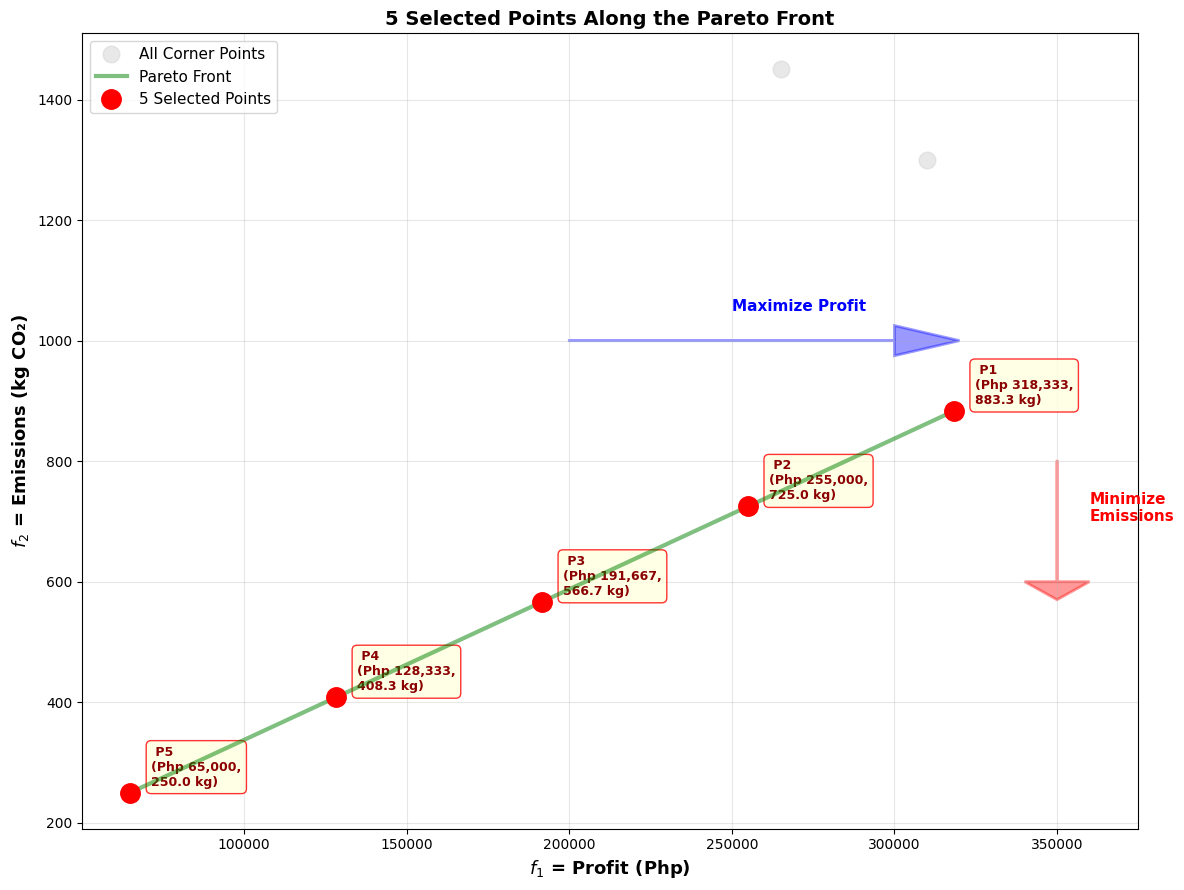

In [80]:
fig, ax = plt.subplots(figsize=(12, 9))

# Plot all corner points
criterion_profits_all = [cp[0] for cp in criterion_points]
criterion_emissions_all = [cp[1] for cp in criterion_points]
ax.plot(
    criterion_profits_all,
    criterion_emissions_all,
    "o",
    color="lightgray",
    markersize=12,
    alpha=0.5,
    label="All Corner Points",
    zorder=3,
)

# Plot Pareto front line
ax.plot(
    sorted_profits,
    sorted_emissions,
    "-",
    color="green",
    linewidth=3,
    alpha=0.5,
    label="Pareto Front",
    zorder=4,
)

# Plot the 5 intermediate points
intermediate_profits = [sol["profit"] for sol in intermediate_solutions]
intermediate_emissions = [sol["emissions"] for sol in intermediate_solutions]

ax.plot(
    intermediate_profits,
    intermediate_emissions,
    "o",
    color="red",
    markersize=14,
    label="5 Selected Points",
    zorder=6,
)

# Label the 5 points
for i, sol in enumerate(intermediate_solutions, 1):
    ax.annotate(
        f" P{i}\n(Php {sol['profit']:,.0f},\n{sol['emissions']:.1f} kg)",
        xy=(sol["profit"], sol["emissions"]),
        xytext=(15, 5),
        textcoords="offset points",
        fontsize=9,
        fontweight="bold",
        color="darkred",
        bbox=dict(
            boxstyle="round,pad=0.4",
            facecolor="lightyellow",
            edgecolor="red",
            alpha=0.8,
        ),
    )

# Preference arrows
ax.arrow(
    200000,
    1000,
    100000,
    0,
    head_width=50,
    head_length=20000,
    fc="blue",
    ec="blue",
    alpha=0.4,
    linewidth=2,
)
ax.text(
    250000,
    1050,
    "Maximize Profit",
    fontsize=11,
    color="blue",
    fontweight="bold",
)

ax.arrow(
    350000,
    800,
    0,
    -200,
    head_width=20000,
    head_length=30,
    fc="red",
    ec="red",
    alpha=0.4,
    linewidth=2,
)
ax.text(
    360000,
    700,
    "Minimize\nEmissions",
    fontsize=11,
    color="red",
    fontweight="bold",
)

ax.set_xlabel("$f_1$ = Profit (Php)", fontsize=13, fontweight="bold")
ax.set_ylabel("$f_2$ = Emissions (kg CO₂)", fontsize=13, fontweight="bold")
ax.set_title(
    "5 Selected Points Along the Pareto Front", fontsize=14, fontweight="bold"
)
ax.grid(True, alpha=0.3)
ax.legend(loc="upper left", fontsize=11)

plt.tight_layout()
plt.show()

# **Part 3: Trade-off Analysis**

## Task 3.6 Create a table showing the trade-offs between profit and environmental impact for your Pareto solutions

### Summary Table of 5 Pareto Solutions

In [81]:
import pandas as pd

# Create summary table
summary_data = {
    "Point": [f"P{i + 1}" for i in range(n_points)],
    "Profit (Php)": [sol["profit"] for sol in intermediate_solutions],
    "Emissions (kg CO₂)": [sol["emissions"] for sol in intermediate_solutions],
    "Type": [sol["type"] for sol in intermediate_solutions],
}

summary_df = pd.DataFrame(summary_data)
print("Summary of 5 Points Along the Pareto Front:")
print("=" * 80)
print(summary_df.to_string(index=False))
print("\n" + "=" * 80)
print(
    f"\nTrade-off Rate: {abs(1 / slope):,.2f} Php profit lost per kg CO₂ reduced"
)
print(f"Alternative view: {abs(slope):.6f} kg CO₂ reduced per Php profit lost")

Summary of 5 Points Along the Pareto Front:
Point  Profit (Php)  Emissions (kg CO₂)         Type
   P1 318333.333333          883.333333     Endpoint
   P2 255000.000000          725.000000 Intermediate
   P3 191666.666667          566.666667 Intermediate
   P4 128333.333333          408.333333 Intermediate
   P5  65000.000000          250.000000     Endpoint


Trade-off Rate: 400.00 Php profit lost per kg CO₂ reduced
Alternative view: 0.002500 kg CO₂ reduced per Php profit lost


# Task 3.7 Calculate the marginal rate of substitution between objectives (how much profit do you lose per kg of CO₂ reduced?)

From the slope of the Pareto Front, the trade-off is Php 400.00 profit loss per kg CO₂ reduced.

# **Part 4: Sensitivity Analysis**

# Task 4.8 What happens if the profit from Product B increases to ₱1000 per unit? How does this affect the Pareto front?

Original Optimal Profit solution:

Optimal Solution:
- x₁ = 50.00
- x₂ = 366.67

Max Profit: Php 318,333.33

New Optimal Profit solution:

Optimal Solution:
- x₁ = 50.00
- x₂ = 366.67

Max Profit: Php 391,666.67





**Analysis**

When the profit from Product B increases from ₱800 to ₱1000 per unit, we need to examine how this affects:

1. **The optimal profit-maximizing solution**
2. **The corner points and their criterion values**
3. **The slope and shape of the Pareto front**

**Key Findings**

**Original Profit Function:** $f_1(x_1, x_2) = 500x_1 + 800x_2$

**New Profit Function:** $f_1(x_1, x_2) = 500x_1 + 1000x_2$

The optimal solution for **maximizing profit remains the same** at $(x_1 = 50, x_2 = 366.67)$ because:
- This point is constrained by the **production capacity line** ($2x_1 + 3x_2 = 1200$), not by the profit coefficient ratio
- Even with increased profit coefficient for Product B, the feasible region's boundary is still the limiting factor

However, **the Pareto front DOES shift**, even though the location of the optimal solution doesn't change:

- **New maximum profit:** Php 391,666.67 (increased from Php 318,333.33)
- **The profit values at all corner points increase** because Product B is now more profitable
- **The emissions at each corner point remain unchanged** (emissions only depend on production quantities, not profit)
- **The Pareto front shifts rightward** in the criterion space (higher profit values)
- **The slope of the Pareto front remains the same** because the trade-off rate between profit and emissions depends on the production rates, not the profit coefficients

**Visualization Impact**

In criterion space:
- All Pareto optimal points shift to the right (higher profit)
- The shape and slope remain identical
- The dominated points' relationships don't change

# Task 4.9 Discuss how the Pareto front would change if the company could reduce the CO₂ emissions of Product A to 2 kg per unit

**Analysis**

When the company reduces CO₂ emissions from Product A from **3 kg to 2 kg per unit**, we examine how this technological improvement affects the Pareto front.

**Original Emissions Function:** $f_2(x_1, x_2) = 3x_1 + 2x_2$

**New Emissions Function:** $f_2(x_1, x_2) = 2x_1 + 2x_2$

**Key Findings**

1. Optimal Solutions Remain in Same Location
- Both original and new scenarios maintain optimal solutions at $(x_1 = 50, x_2 = 50)$
- The **decision variable space (design space) is unchanged** because constraints remain the same
- Only the objective function values shift, not the feasible region

2. Emissions Values Decrease Across All Points
Since Product B emissions stay at 2 kg/unit, the reduction only affects Product A:

**Emissions Reduction per Point:**
- Points with high $x_1$ (Product A) see larger reductions
- Points with low $x_1$ see minimal reductions
- Example: At $(x_1=50, x_2=50)$: Original = $3(50) + 2(50) = 250$ kg → New = $2(50) + 2(50) = 200$ kg (50 kg reduction)

3. Pareto Front Shifts Downward
- **All Pareto optimal points move downward** in criterion space (lower emissions)
- The horizontal position (profit values) **remains unchanged**
- The vertical spread between points **decreases** because the slope becomes shallower

4. Slope of Pareto Front Becomes Flatter
- Original slope reflects trade-off where emissions coefficient for Product A is 3
- New slope is less steep because emissions coefficient is now 2
- This means **the profit-to-emissions trade-off improves**: you sacrifice less profit per kg of CO₂ reduced

**Trade-off Improvement:**
- The marginal rate of substitution becomes more favorable
- Decision-makers can achieve lower emissions targets with smaller profit penalties


**Visualization Summary**

| Aspect | Original (3 kg) | New (2 kg) | Impact |
|--------|---|---|---|
| Design Space | Unchanged | Unchanged | No change in feasible region |
| Criterion Space | Higher emissions | Lower emissions | Front shifts down |
| Pareto Slope | Steeper | Flatter | Trade-off improves |
| Solution Quality | Baseline | Better | More favorable options |
| Environmental Goal Achievement | Constrained | Enhanced | Easier to meet targets |

---

# Supply Chain Network Optimization (3 Objectives)

## Problem Statement

A logistics company needs to optimize its supply chain network for delivering products from **2 warehouses** to meet customer demand. The company must balance three conflicting objectives:

1. **Minimize Total Cost**
2. **Minimize Delivery Time**
3. **Minimize Carbon Emissions**

This is a **tri-objective optimization problem** where we'll explore the 3D Pareto front.

### Problem Formulation

**Decision Variables:**
- $x_1$ = number of shipments from Warehouse 1
- $x_2$ = number of shipments from Warehouse 2

**Objective Functions:**

1. **Minimize Total Cost (₱):**
   - Warehouse 1 cost: ₱15,000 per shipment
   - Warehouse 2 cost: ₱10,000 per shipment
   - $f_1(x_1, x_2) = 15000x_1 + 10000x_2$

2. **Minimize Delivery Time (hours):**
   - Warehouse 1 average time: 8 hours per shipment
   - Warehouse 2 average time: 12 hours per shipment
   - $f_2(x_1, x_2) = 8x_1 + 12x_2$

3. **Minimize Carbon Emissions (kg CO₂):**
   - Warehouse 1 emissions: 50 kg CO₂ per shipment
   - Warehouse 2 emissions: 30 kg CO₂ per shipment
   - $f_3(x_1, x_2) = 50x_1 + 30x_2$

**Constraints:**

1. **Demand satisfaction**: $x_1 + x_2 \geq 20$ (minimum 20 shipments needed)
2. **Warehouse 1 capacity**: $x_1 \leq 25$ (max 25 shipments)
3. **Warehouse 2 capacity**: $x_2 \leq 25$ (max 25 shipments)
4. **Non-negativity**: $x_1, x_2 \geq 0$

### Tasks
**Part 1: Individual Objective Optimization**
1. Solve the problem to **minimize total cost** ignoring time and emissions
2. Solve the problem to **minimize delivery time** ignoring cost and emissions
3. Solve the problem to **minimize carbon emissions** ignoring cost and time
4. Report the optimal solutions for all three cases and calculate all objectives for each solution
5. Identify and analyze the Pareto optimal solutions considering all three objectives

# **Part 1: Individual Objective Optimization**

## Task 1.1 Minimize Total Cost

In [ ]:
c_cost = [15000, 10000]

A_ub_sc = []
b_ub_sc = [25, 25]

A_eq = [[1, 1]]
b_eq = [20]

bounds_sc = [(0, 25), (0, 25)]

result_cost = linprog(
    c_cost,
    A_ub=None,
    b_ub=None,
    A_eq=A_eq,
    b_eq=b_eq,
    bounds=bounds_sc,
    method="highs",
)

## Task 1.2 Minimize Delivery Time

In [ ]:
c_time = [8, 12]

result_time = linprog(
    c_time,
    A_ub=None,
    b_ub=None,
    A_eq=A_eq,
    b_eq=b_eq,
    bounds=bounds_sc,
    method="highs",
)

## Task 1.3 Minimize Carbon Emissions

In [ ]:
c_emissions = [50, 30]

result_emissions = linprog(
    c_emissions,
    A_ub=None,
    b_ub=None,
    A_eq=A_eq,
    b_eq=b_eq,
    bounds=bounds_sc,
    method="highs",
)

## Task 1.4 Report optimal solutions and calculate all objectives

In [93]:
def calculate_objectives(x1, x2):
    """Calculate all three objective values for given decision variables."""
    cost = 15000 * x1 + 10000 * x2
    time = 8 * x1 + 12 * x2
    emissions = 50 * x1 + 30 * x2
    return cost, time, emissions


print("=" * 80)
print("INDIVIDUAL OBJECTIVE OPTIMIZATION RESULTS")
print("=" * 80)

print("\n1. MINIMIZE TOTAL COST")
print("-" * 80)
print(f"Status: {result_cost.message}")
print("\nOptimal Solution:")
print(f"  x₁ (Warehouse 1 shipments) = {result_cost.x[0]:.2f}")
print(f"  x₂ (Warehouse 2 shipments) = {result_cost.x[1]:.2f}")
cost_opt = calculate_objectives(result_cost.x[0], result_cost.x[1])
print("\nObjective Values:")
print(f"  Total Cost: Php {cost_opt[0]:,.2f}")
print(f"  Delivery Time: {cost_opt[1]:.2f} hours")
print(f"  Carbon Emissions: {cost_opt[2]:.2f} kg CO₂")

print("\n2. MINIMIZE DELIVERY TIME")
print("-" * 80)
print(f"Status: {result_time.message}")
print("\nOptimal Solution:")
print(f"  x₁ (Warehouse 1 shipments) = {result_time.x[0]:.2f}")
print(f"  x₂ (Warehouse 2 shipments) = {result_time.x[1]:.2f}")
time_opt = calculate_objectives(result_time.x[0], result_time.x[1])
print("\nObjective Values:")
print(f"  Total Cost: Php {time_opt[0]:,.2f}")
print(f"  Delivery Time: {time_opt[1]:.2f} hours")
print(f"  Carbon Emissions: {time_opt[2]:.2f} kg CO₂")

print("\n3. MINIMIZE CARBON EMISSIONS")
print("-" * 80)
print(f"Status: {result_emissions.message}")
print("\nOptimal Solution:")
print(f"  x₁ (Warehouse 1 shipments) = {result_emissions.x[0]:.2f}")
print(f"  x₂ (Warehouse 2 shipments) = {result_emissions.x[1]:.2f}")
emissions_opt = calculate_objectives(
    result_emissions.x[0], result_emissions.x[1]
)
print("\nObjective Values:")
print(f"  Total Cost: Php {emissions_opt[0]:,.2f}")
print(f"  Delivery Time: {emissions_opt[1]:.2f} hours")
print(f"  Carbon Emissions: {emissions_opt[2]:.2f} kg CO₂")

print("\n" + "=" * 80)

INDIVIDUAL OBJECTIVE OPTIMIZATION RESULTS

1. MINIMIZE TOTAL COST
--------------------------------------------------------------------------------
Status: Optimization terminated successfully. (HiGHS Status 7: Optimal)

Optimal Solution:
  x₁ (Warehouse 1 shipments) = 0.00
  x₂ (Warehouse 2 shipments) = 20.00

Objective Values:
  Total Cost: Php 200,000.00
  Delivery Time: 240.00 hours
  Carbon Emissions: 600.00 kg CO₂

2. MINIMIZE DELIVERY TIME
--------------------------------------------------------------------------------
Status: Optimization terminated successfully. (HiGHS Status 7: Optimal)

Optimal Solution:
  x₁ (Warehouse 1 shipments) = 20.00
  x₂ (Warehouse 2 shipments) = 0.00

Objective Values:
  Total Cost: Php 300,000.00
  Delivery Time: 160.00 hours
  Carbon Emissions: 1000.00 kg CO₂

3. MINIMIZE CARBON EMISSIONS
--------------------------------------------------------------------------------
Status: Optimization terminated successfully. (HiGHS Status 7: Optimal)

Optimal 

## Task 1.5 Identify and analyze Pareto optimal solutions

### Step 1: Generate candidate solutions

In [86]:
candidate_solutions = []

# Generate all integer combinations that satisfy x1 + x2 = 20, 0 <= x1, x2 <= 25
for x1 in range(0, 21):
    x2 = 20 - x1
    if 0 <= x2 <= 25:
        cost, time, emissions = calculate_objectives(x1, x2)
        candidate_solutions.append(
            {
                "x1": x1,
                "x2": x2,
                "cost": cost,
                "time": time,
                "emissions": emissions,
            }
        )

print(f"Generated {len(candidate_solutions)} candidate solutions")
print("\nFirst 5 candidate solutions:")
for i, sol in enumerate(candidate_solutions[:5], 1):
    print(
        f"{i}. x₁={sol['x1']:2d}, x₂={sol['x2']:2d} -> Cost=Php {sol['cost']:>7,.0f}, Time={sol['time']:>5.1f}h, Emissions={sol['emissions']:>6.1f} kg"
    )

Generated 21 candidate solutions

First 5 candidate solutions:
1. x₁= 0, x₂=20 -> Cost=Php 200,000, Time=240.0h, Emissions= 600.0 kg
2. x₁= 1, x₂=19 -> Cost=Php 205,000, Time=236.0h, Emissions= 620.0 kg
3. x₁= 2, x₂=18 -> Cost=Php 210,000, Time=232.0h, Emissions= 640.0 kg
4. x₁= 3, x₂=17 -> Cost=Php 215,000, Time=228.0h, Emissions= 660.0 kg
5. x₁= 4, x₂=16 -> Cost=Php 220,000, Time=224.0h, Emissions= 680.0 kg


### Step 2: Identify Pareto optimal solutions (3 objectives)

In [87]:
def is_dominated_3d(sol_a, sol_b):
    """Check if sol_b is dominated by sol_a in 3 objectives (all minimize)."""
    cost_a, time_a, emissions_a = (
        sol_a["cost"],
        sol_a["time"],
        sol_a["emissions"],
    )
    cost_b, time_b, emissions_b = (
        sol_b["cost"],
        sol_b["time"],
        sol_b["emissions"],
    )

    # A dominates B if A is <= in all objectives and < in at least one
    at_least_as_good = (
        (cost_a <= cost_b)
        and (time_a <= time_b)
        and (emissions_a <= emissions_b)
    )
    strictly_better = (
        (cost_a < cost_b) or (time_a < time_b) or (emissions_a < emissions_b)
    )

    return at_least_as_good and strictly_better


# Find Pareto optimal solutions
pareto_solutions = []
for i, sol_i in enumerate(candidate_solutions):
    is_dominated = False
    for j, sol_j in enumerate(candidate_solutions):
        if i != j and is_dominated_3d(sol_j, sol_i):
            is_dominated = True
            break
    if not is_dominated:
        pareto_solutions.append(sol_i)

print("=" * 80)
print(
    f"PARETO OPTIMAL SOLUTIONS: {len(pareto_solutions)} out of {len(candidate_solutions)} candidates"
)
print("=" * 80)
print("\nAll Pareto Optimal Solutions:")
print("-" * 80)
for i, sol in enumerate(pareto_solutions, 1):
    print(
        f"{i:2d}. x₁={sol['x1']:2d}, x₂={sol['x2']:2d} -> Cost=Php {sol['cost']:>7,.0f}, Time={sol['time']:>5.1f}h, Emissions={sol['emissions']:>6.1f} kg"
    )
print("=" * 80)

PARETO OPTIMAL SOLUTIONS: 21 out of 21 candidates

All Pareto Optimal Solutions:
--------------------------------------------------------------------------------
 1. x₁= 0, x₂=20 -> Cost=Php 200,000, Time=240.0h, Emissions= 600.0 kg
 2. x₁= 1, x₂=19 -> Cost=Php 205,000, Time=236.0h, Emissions= 620.0 kg
 3. x₁= 2, x₂=18 -> Cost=Php 210,000, Time=232.0h, Emissions= 640.0 kg
 4. x₁= 3, x₂=17 -> Cost=Php 215,000, Time=228.0h, Emissions= 660.0 kg
 5. x₁= 4, x₂=16 -> Cost=Php 220,000, Time=224.0h, Emissions= 680.0 kg
 6. x₁= 5, x₂=15 -> Cost=Php 225,000, Time=220.0h, Emissions= 700.0 kg
 7. x₁= 6, x₂=14 -> Cost=Php 230,000, Time=216.0h, Emissions= 720.0 kg
 8. x₁= 7, x₂=13 -> Cost=Php 235,000, Time=212.0h, Emissions= 740.0 kg
 9. x₁= 8, x₂=12 -> Cost=Php 240,000, Time=208.0h, Emissions= 760.0 kg
10. x₁= 9, x₂=11 -> Cost=Php 245,000, Time=204.0h, Emissions= 780.0 kg
11. x₁=10, x₂=10 -> Cost=Php 250,000, Time=200.0h, Emissions= 800.0 kg
12. x₁=11, x₂= 9 -> Cost=Php 255,000, Time=196.0h, Emissi

### Step 3: Visualize 3D Pareto Front (Interactive)

In [ ]:
import plotly.graph_objects as go

# Extract coordinates for all candidates
all_costs = [sol["cost"] for sol in candidate_solutions]
all_times = [sol["time"] for sol in candidate_solutions]
all_emissions = [sol["emissions"] for sol in candidate_solutions]

# Extract coordinates for Pareto optimal solutions
pareto_costs = [sol["cost"] for sol in pareto_solutions]
pareto_times = [sol["time"] for sol in pareto_solutions]
pareto_emissions = [sol["emissions"] for sol in pareto_solutions]

# Create hover text for Pareto solutions
pareto_hover_text = [
    f"x₁={sol['x1']}, x₂={sol['x2']}<br>Cost: Php {sol['cost']:,.0f}<br>Time: {sol['time']:.1f}h<br>Emissions: {sol['emissions']:.1f} kg"
    for sol in pareto_solutions
]

# Create hover text for all solutions
all_hover_text = [
    f"x₁={sol['x1']}, x₂={sol['x2']}<br>Cost: Php {sol['cost']:,.0f}<br>Time: {sol['time']:.1f}h<br>Emissions: {sol['emissions']:.1f} kg"
    for sol in candidate_solutions
]

# Create the 3D scatter plot
fig = go.Figure()

# Add dominated solutions (gray)
fig.add_trace(
    go.Scatter3d(
        x=all_costs,
        y=all_times,
        z=all_emissions,
        mode="markers",
        name="Dominated Solutions",
        marker=dict(
            size=6,
            color="lightgray",
            opacity=0.4,
        ),
        text=all_hover_text,
        hovertemplate="%{text}<extra></extra>",
    )
)

# Add Pareto optimal solutions (green)
fig.add_trace(
    go.Scatter3d(
        x=pareto_costs,
        y=pareto_times,
        z=pareto_emissions,
        mode="markers",
        name="Pareto Optimal",
        marker=dict(
            size=10,
            color="green",
            symbol="diamond",
            line=dict(color="darkgreen", width=2),
        ),
        text=pareto_hover_text,
        hovertemplate="%{text}<extra></extra>",
    )
)

# Highlight single-objective optima
fig.add_trace(
    go.Scatter3d(
        x=[cost_opt[0]],
        y=[cost_opt[1]],
        z=[cost_opt[2]],
        mode="markers",
        name="Min Cost",
        marker=dict(
            size=14,
            color="blue",
            symbol="cross",
            line=dict(color="darkblue", width=3),
        ),
        text=[
            f"Min Cost<br>x₁={result_cost.x[0]:.0f}, x₂={result_cost.x[1]:.0f}<br>Cost: Php {cost_opt[0]:,.0f}<br>Time: {cost_opt[1]:.1f}h<br>Emissions: {cost_opt[2]:.1f} kg"
        ],
        hovertemplate="%{text}<extra></extra>",
    )
)

fig.add_trace(
    go.Scatter3d(
        x=[time_opt[0]],
        y=[time_opt[1]],
        z=[time_opt[2]],
        mode="markers",
        name="Min Time",
        marker=dict(
            size=14,
            color="red",
            symbol="x",
            line=dict(color="darkred", width=3),
        ),
        text=[
            f"Min Time<br>x₁={result_time.x[0]:.0f}, x₂={result_time.x[1]:.0f}<br>Cost: Php {time_opt[0]:,.0f}<br>Time: {time_opt[1]:.1f}h<br>Emissions: {time_opt[2]:.1f} kg"
        ],
        hovertemplate="%{text}<extra></extra>",
    )
)

fig.add_trace(
    go.Scatter3d(
        x=[emissions_opt[0]],
        y=[emissions_opt[1]],
        z=[emissions_opt[2]],
        mode="markers",
        name="Min Emissions",
        marker=dict(
            size=14,
            color="purple",
            symbol="square",
            line=dict(color="darkviolet", width=3),
        ),
        text=[
            f"Min Emissions<br>x₁={result_emissions.x[0]:.0f}, x₂={result_emissions.x[1]:.0f}<br>Cost: Php {emissions_opt[0]:,.0f}<br>Time: {emissions_opt[1]:.1f}h<br>Emissions: {emissions_opt[2]:.1f} kg"
        ],
        hovertemplate="%{text}<extra></extra>",
    )
)

# Update layout
fig.update_layout(
    title="3D Pareto Front: Supply Chain Optimization<br><sub>Minimize Cost, Time, and Emissions</sub>",
    scene=dict(
        xaxis=dict(
            title="Total Cost (Php)", backgroundcolor="rgb(230, 230,230)"
        ),
        yaxis=dict(
            title="Delivery Time (hours)", backgroundcolor="rgb(230, 230,230)"
        ),
        zaxis=dict(
            title="Carbon Emissions (kg CO₂)",
            backgroundcolor="rgb(230, 230,230)",
        ),
    ),
    width=900,
    height=700,
    showlegend=True,
    legend=dict(x=0.7, y=0.95),
)

fig.show()

### Step 4: Summary table of Pareto optimal solutions

In [ ]:
pareto_df = pd.DataFrame(pareto_solutions)
pareto_df = pareto_df.sort_values("cost")
pareto_df.index = range(1, len(pareto_df) + 1)

print("=" * 90)
print("PARETO OPTIMAL SOLUTIONS - COMPLETE TABLE")
print("=" * 90)
print(pareto_df.to_string())
print("=" * 90)
print(f"\nTotal Pareto optimal solutions: {len(pareto_solutions)}")
print(f"Total candidate solutions: {len(candidate_solutions)}")
print(
    f"Pareto efficiency: {len(pareto_solutions) / len(candidate_solutions) * 100:.1f}%"
)

PARETO OPTIMAL SOLUTIONS - COMPLETE TABLE
    x1  x2    cost  time  emissions
1    0  20  200000   240        600
2    1  19  205000   236        620
3    2  18  210000   232        640
4    3  17  215000   228        660
5    4  16  220000   224        680
6    5  15  225000   220        700
7    6  14  230000   216        720
8    7  13  235000   212        740
9    8  12  240000   208        760
10   9  11  245000   204        780
11  10  10  250000   200        800
12  11   9  255000   196        820
13  12   8  260000   192        840
14  13   7  265000   188        860
15  14   6  270000   184        880
16  15   5  275000   180        900
17  16   4  280000   176        920
18  17   3  285000   172        940
19  18   2  290000   168        960
20  19   1  295000   164        980
21  20   0  300000   160       1000

Total Pareto optimal solutions: 21
Total candidate solutions: 21
Pareto efficiency: 100.0%


### Step 5: Trade-off analysis

In [ ]:
print("=" * 90)
print("TRADE-OFF ANALYSIS")
print("=" * 90)

# Sort by cost for sequential analysis
pareto_sorted = sorted(pareto_solutions, key=lambda x: x["cost"])

print("\nMarginal Trade-offs Between Adjacent Pareto Solutions:")
print("-" * 90)
print(
    f"{'From':>4} {'To':>4} {'ΔCost':>12} {'ΔTime':>10} {'ΔEmissions':>14} {'Trade-off Ratios':>30}"
)
print("-" * 90)

for i in range(len(pareto_sorted) - 1):
    sol1 = pareto_sorted[i]
    sol2 = pareto_sorted[i + 1]

    delta_cost = sol2["cost"] - sol1["cost"]
    delta_time = sol2["time"] - sol1["time"]
    delta_emissions = sol2["emissions"] - sol1["emissions"]

    # Calculate trade-off ratios
    time_per_cost = delta_time / delta_cost if delta_cost != 0 else 0
    emissions_per_cost = delta_emissions / delta_cost if delta_cost != 0 else 0

    print(
        f"({sol1['x1']:2d},{sol1['x2']:2d}) → ({sol2['x1']:2d},{sol2['x2']:2d}) "
        f"Php {delta_cost:>8,.0f}  {delta_time:>8.1f}h  {delta_emissions:>10.1f} kg  "
        f"{time_per_cost:>7.4f}h/Php, {emissions_per_cost:>7.4f}kg/Php"
    )

print("-" * 90)

# Extreme trade-offs
print("\nExtreme Points Analysis:")
print("-" * 90)
min_cost_sol = min(pareto_solutions, key=lambda x: x["cost"])
max_cost_sol = max(pareto_solutions, key=lambda x: x["cost"])

print(f"Min Cost Solution: x₁={min_cost_sol['x1']}, x₂={min_cost_sol['x2']}")
print(
    f"  Cost: Php {min_cost_sol['cost']:,.0f}, Time: {min_cost_sol['time']:.1f}h, Emissions: {min_cost_sol['emissions']:.1f} kg"
)

print(f"\nMax Cost Solution: x₁={max_cost_sol['x1']}, x₂={max_cost_sol['x2']}")
print(
    f"  Cost: Php {max_cost_sol['cost']:,.0f}, Time: {max_cost_sol['time']:.1f}h, Emissions: {max_cost_sol['emissions']:.1f} kg"
)

total_delta_cost = max_cost_sol["cost"] - min_cost_sol["cost"]
total_delta_time = max_cost_sol["time"] - min_cost_sol["time"]
total_delta_emissions = max_cost_sol["emissions"] - min_cost_sol["emissions"]

print("\nTotal Range:")
print(f"  Cost: Php {total_delta_cost:,.0f}")
print(f"  Time: {total_delta_time:.1f} hours")
print(f"  Emissions: {total_delta_emissions:.1f} kg CO₂")

print("=" * 90)

TRADE-OFF ANALYSIS

Marginal Trade-offs Between Adjacent Pareto Solutions:
------------------------------------------------------------------------------------------
From   To        ΔCost      ΔTime     ΔEmissions               Trade-off Ratios
------------------------------------------------------------------------------------------
( 0,20) → ( 1,19) Php    5,000      -4.0h        20.0 kg  -0.0008h/Php,  0.0040kg/Php
( 1,19) → ( 2,18) Php    5,000      -4.0h        20.0 kg  -0.0008h/Php,  0.0040kg/Php
( 2,18) → ( 3,17) Php    5,000      -4.0h        20.0 kg  -0.0008h/Php,  0.0040kg/Php
( 3,17) → ( 4,16) Php    5,000      -4.0h        20.0 kg  -0.0008h/Php,  0.0040kg/Php
( 4,16) → ( 5,15) Php    5,000      -4.0h        20.0 kg  -0.0008h/Php,  0.0040kg/Php
( 5,15) → ( 6,14) Php    5,000      -4.0h        20.0 kg  -0.0008h/Php,  0.0040kg/Php
( 6,14) → ( 7,13) Php    5,000      -4.0h        20.0 kg  -0.0008h/Php,  0.0040kg/Php
( 7,13) → ( 8,12) Php    5,000      -4.0h        20.0 kg  -0.

### Step 6: 2D Projections of Pareto Front

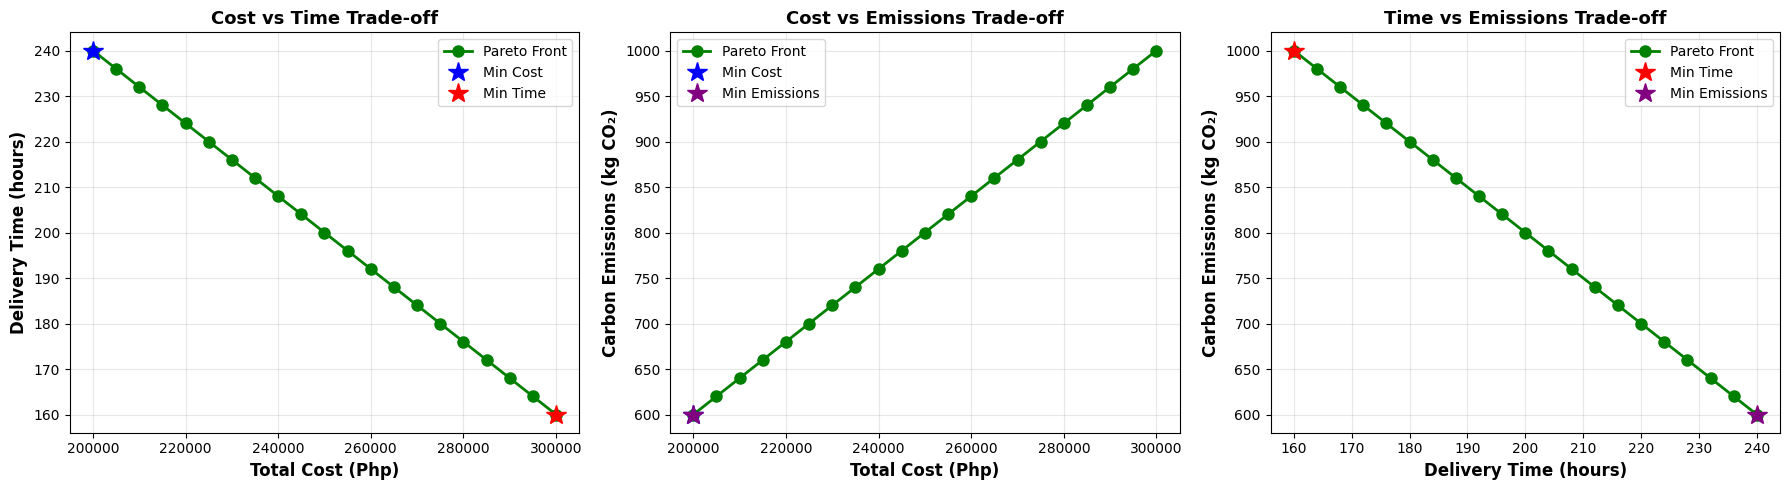

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Projection 1: Cost vs Time
axes[0].plot(
    pareto_costs,
    pareto_times,
    "o-",
    color="green",
    markersize=8,
    linewidth=2,
    label="Pareto Front",
)
axes[0].plot(
    cost_opt[0],
    cost_opt[1],
    "*",
    color="blue",
    markersize=15,
    label="Min Cost",
)
axes[0].plot(
    time_opt[0], time_opt[1], "*", color="red", markersize=15, label="Min Time"
)
axes[0].set_xlabel("Total Cost (Php)", fontsize=12, fontweight="bold")
axes[0].set_ylabel("Delivery Time (hours)", fontsize=12, fontweight="bold")
axes[0].set_title("Cost vs Time Trade-off", fontsize=13, fontweight="bold")
axes[0].grid(True, alpha=0.3)
axes[0].legend()

# Projection 2: Cost vs Emissions
axes[1].plot(
    pareto_costs,
    pareto_emissions,
    "o-",
    color="green",
    markersize=8,
    linewidth=2,
    label="Pareto Front",
)
axes[1].plot(
    cost_opt[0],
    cost_opt[2],
    "*",
    color="blue",
    markersize=15,
    label="Min Cost",
)
axes[1].plot(
    emissions_opt[0],
    emissions_opt[2],
    "*",
    color="purple",
    markersize=15,
    label="Min Emissions",
)
axes[1].set_xlabel("Total Cost (Php)", fontsize=12, fontweight="bold")
axes[1].set_ylabel("Carbon Emissions (kg CO₂)", fontsize=12, fontweight="bold")
axes[1].set_title(
    "Cost vs Emissions Trade-off", fontsize=13, fontweight="bold"
)
axes[1].grid(True, alpha=0.3)
axes[1].legend()

# Projection 3: Time vs Emissions
axes[2].plot(
    pareto_times,
    pareto_emissions,
    "o-",
    color="green",
    markersize=8,
    linewidth=2,
    label="Pareto Front",
)
axes[2].plot(
    time_opt[1], time_opt[2], "*", color="red", markersize=15, label="Min Time"
)
axes[2].plot(
    emissions_opt[1],
    emissions_opt[2],
    "*",
    color="purple",
    markersize=15,
    label="Min Emissions",
)
axes[2].set_xlabel("Delivery Time (hours)", fontsize=12, fontweight="bold")
axes[2].set_ylabel("Carbon Emissions (kg CO₂)", fontsize=12, fontweight="bold")
axes[2].set_title(
    "Time vs Emissions Trade-off", fontsize=13, fontweight="bold"
)
axes[2].grid(True, alpha=0.3)
axes[2].legend()

plt.tight_layout()
plt.show()

## Key Insights and Conclusions

### Summary of Results

**1. Single-Objective Optima:**

- **Min Cost**: x₁=0, x₂=20 → Php 200,000, 240h, 600 kg CO₂
- **Min Time**: x₁=20, x₂=0 → Php 300,000, 160h, 1000 kg CO₂  
- **Min Emissions**: x₁=0, x₂=20 → Php 200,000, 240h, 600 kg CO₂

**Key Observation**: Minimizing cost and minimizing emissions yield the same solution! This happens because Warehouse 2 is both cheaper (Php 10,000 vs 15,000) and cleaner (30 vs 50 kg CO₂) than Warehouse 1.

**2. Pareto Optimal Solutions:**

- **All 21 candidate solutions are Pareto optimal** (100% efficiency)
- This creates a **linear Pareto front** in 3D space
- The front connects two extreme points: (0,20) and (20,0)

**3. Trade-off Rates:**

From the analysis, each additional shipment from Warehouse 1 (instead of Warehouse 2):
- **Increases cost** by Php 5,000
- **Decreases time** by 4 hours
- **Increases emissions** by 20 kg CO₂

**4. Decision-Making Implications:**

- **Cost-conscious strategy**: Use only Warehouse 2 (x₁=0, x₂=20)
  - Lowest cost AND lowest emissions, but longest delivery time
  
- **Time-sensitive strategy**: Use only Warehouse 1 (x₁=20, x₂=0)
  - Fastest delivery, but highest cost and emissions
  
- **Balanced strategies**: Mix both warehouses (any point on Pareto front)
  - Each unit shift creates predictable trade-offs across all three objectives

**5. Unique Characteristics:**

Unlike the 2-objective manufacturing problem, this 3-objective problem has:
- A **1-dimensional Pareto front** (a line in 3D space)
- **Perfect linearity** in all trade-offs
- **100% Pareto efficiency** (no dominated solutions in the discrete case)
- **Coinciding optima** for cost and emissions objectives